# About

On this notebook we setup the last and complete steps for the pipeline.

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Definitions

REGION = "Liniers"

In [24]:
from tqdm import tqdm
tqdm.pandas()

import tools
import settings

settings.CONSTANTS.DEFAULT_CELL_SIZE_METERS = 10

In [25]:
subset = tools.load_subset(REGION)
subset

Subset Liniers loaded with 18977 entries.


latitude  longitude  area_in_meters  confidence  \
0     -34.647908 -58.538768         65.2091      0.6789   
1     -34.646404 -58.530037         55.1192      0.7269   
2     -34.643235 -58.528175         30.7793      0.7245   
3     -34.645557 -58.539914          8.4917      0.6968   
4     -34.650375 -58.523097         78.2641      0.8486   
...          ...        ...             ...         ...   
18972 -34.650807 -58.533399         37.0357      0.7575   
18973 -34.642205 -58.526698         83.0676      0.7458   
18974 -34.642080 -58.537778         26.8570      0.6835   
18975 -34.654978 -58.522570         60.7074      0.6622   
18976 -34.654656 -58.523471         26.6429      0.6812   

                                                geometry full_plus_code  
0      POLYGON((-58.5387048136301 -34.6479257364195, ...  48Q39F26+RFQM  
1      POLYGON((-58.5299792564481 -34.6464036816073, ...  48Q39F39+CXPX  
2      POLYGON((-58.5281533507678 -34.6432734963289, ...  48Q39F4C+PP4F  
3      POLYGON((-58.5398935226598 -34.6455644150701, ...  48Q39F36+Q2GQ  
4      POLYGON((-58.5230305388537 -34.6503602481945, ...  48Q38FXG+RQRX  
...                                                  ...            ...  
18972  POLYGON((-58.5333526719321 -34.6507991703479, ...  48Q38FX8+MJHJ  
18973  POLYGON((-58.5266422684577 -34.6422412657396, ...  48Q39F5F+487P  
18974  POLYGON((-58.5377522895465 -34.6421062913985, ...  48Q39F56+5V9R  
18975  POLYGON((-58.5225242457944 -34.6549948388141, ...  48Q38FWG+2X3X  
18976  POLYGON((-58.5234909826921 -34.654620493173, -...  48Q38FWG+4JJQ  

[18977 rows x 6 columns]

In [26]:
# We transform data types and create the geopandas dataframe
subset = tools.convert_to_gpd(subset)
subset

latitude  longitude  area_in_meters  confidence  \
0     -34.647908 -58.538768         65.2091      0.6789   
1     -34.646404 -58.530037         55.1192      0.7269   
2     -34.643235 -58.528175         30.7793      0.7245   
3     -34.645557 -58.539914          8.4917      0.6968   
4     -34.650375 -58.523097         78.2641      0.8486   
...          ...        ...             ...         ...   
18972 -34.650807 -58.533399         37.0357      0.7575   
18973 -34.642205 -58.526698         83.0676      0.7458   
18974 -34.642080 -58.537778         26.8570      0.6835   
18975 -34.654978 -58.522570         60.7074      0.6622   
18976 -34.654656 -58.523471         26.6429      0.6812   

                                                geometry full_plus_code  
0      POLYGON ((-58.5387 -34.64793, -58.53878 -34.64...  48Q39F26+RFQM  
1      POLYGON ((-58.52998 -34.6464, -58.53004 -34.64...  48Q39F39+CXPX  
2      POLYGON ((-58.52815 -34.64327, -58.52816 -34.6...  48Q39F4C+PP4F  
3      POLYGON ((-58.53989 -34.64556, -58.5399 -34.64...  48Q39F36+Q2GQ  
4      POLYGON ((-58.52303 -34.65036, -58.5231 -34.65...  48Q38FXG+RQRX  
...                                                  ...            ...  
18972  POLYGON ((-58.53335 -34.6508, -58.5334 -34.650...  48Q38FX8+MJHJ  
18973  POLYGON ((-58.52664 -34.64224, -58.52665 -34.6...  48Q39F5F+487P  
18974  POLYGON ((-58.53775 -34.64211, -58.53776 -34.6...  48Q39F56+5V9R  
18975  POLYGON ((-58.52252 -34.65499, -58.52254 -34.6...  48Q38FWG+2X3X  
18976  POLYGON ((-58.52349 -34.65462, -58.52352 -34.6...  48Q38FWG+4JJQ  

[18977 rows x 6 columns]

<Axes: >

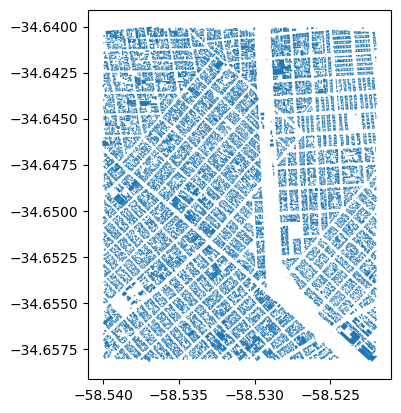

In [27]:
# We check the visualization of the data
subset.plot() # This could take a while for big subsets.

In [28]:
long_area_center, lat_area_center = tools.get_region_centroid(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.531408632757156, -34.64893585819944


<Axes: >

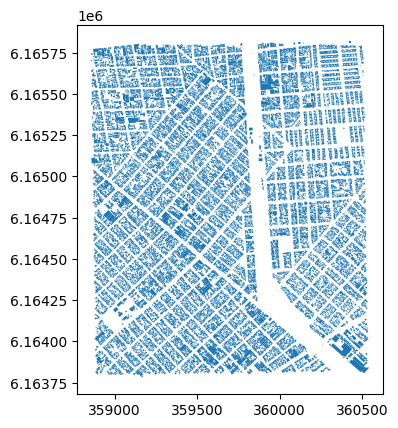

In [29]:
# Now we convert the representation system to UTM
subset = tools.convert_to_UTM(subset)
subset.plot()

In [30]:
area_center_x, area_center_y = tools.get_region_centroid(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.531408632757156, -34.64893585819944


In [31]:
subset

latitude  longitude  area_in_meters  confidence  \
0     -34.647908 -58.538768         65.2091      0.6789   
1     -34.646404 -58.530037         55.1192      0.7269   
2     -34.643235 -58.528175         30.7793      0.7245   
3     -34.645557 -58.539914          8.4917      0.6968   
4     -34.650375 -58.523097         78.2641      0.8486   
...          ...        ...             ...         ...   
18972 -34.650807 -58.533399         37.0357      0.7575   
18973 -34.642205 -58.526698         83.0676      0.7458   
18974 -34.642080 -58.537778         26.8570      0.6835   
18975 -34.654978 -58.522570         60.7074      0.6622   
18976 -34.654656 -58.523471         26.6429      0.6812   

                                                geometry full_plus_code  \
0      POLYGON ((358985.841 6164922.831, 358978.669 6...  48Q39F26+RFQM   
1      POLYGON ((359782.996 6165103.811, 359777.299 6...  48Q39F39+CXPX   
2      POLYGON ((359945.083 6165453.5, 359944.519 616...  48Q39F4C+PP4F   
3      POLYGON ((358872.89 6165183.046, 358872.017 61...  48Q39F36+Q2GQ   
4      POLYGON ((360426.508 6164674.662, 360419.846 6...  48Q38FXG+RQRX   
...                                                  ...            ...   
18972  POLYGON ((359481.228 6164611.634, 359477.094 6...  48Q38FX8+MJHJ   
18973  POLYGON ((360081.851 6165570.078, 360081.332 6...  48Q39F5F+487P   
18974  POLYGON ((359063.292 6165569.563, 359062.815 6...  48Q39F56+5V9R   
18975  POLYGON ((360480.677 6164161.369, 360479.549 6...  48Q38FWG+2X3X   
18976  POLYGON ((360391.453 6164201.546, 360389.26 61...  48Q38FWG+4JJQ   

             coord_x       coord_y  
0      358979.990770  6.164925e+06  
1      359777.745334  6.165104e+06  
2      359943.041623  6.165458e+06  
3      358870.995453  6.165184e+06  
4      360420.427166  6.164673e+06  
...              ...           ...  
18972  359476.964667  6.164611e+06  
18973  360076.677806  6.165574e+06  
18974  359060.882482  6.165572e+06  
18975  360476.483431  6.164163e+06  
18976  360393.373634  6.164198e+06  

[18977 rows x 8 columns]

In [32]:
# We add the relative to area center positions in terms of cells and cell size

subset = tools.add_derivate_columns(subset)
subset

latitude  longitude  area_in_meters  confidence  \
0     -34.647908 -58.538768         65.2091      0.6789   
1     -34.646404 -58.530037         55.1192      0.7269   
2     -34.643235 -58.528175         30.7793      0.7245   
3     -34.645557 -58.539914          8.4917      0.6968   
4     -34.650375 -58.523097         78.2641      0.8486   
...          ...        ...             ...         ...   
18972 -34.650807 -58.533399         37.0357      0.7575   
18973 -34.642205 -58.526698         83.0676      0.7458   
18974 -34.642080 -58.537778         26.8570      0.6835   
18975 -34.654978 -58.522570         60.7074      0.6622   
18976 -34.654656 -58.523471         26.6429      0.6812   

                                                geometry full_plus_code  \
0      POLYGON ((358985.841 6164922.831, 358978.669 6...  48Q39F26+RFQM   
1      POLYGON ((359782.996 6165103.811, 359777.299 6...  48Q39F39+CXPX   
2      POLYGON ((359945.083 6165453.5, 359944.519 616...  48Q39F4C+PP4F   
3      POLYGON ((358872.89 6165183.046, 358872.017 61...  48Q39F36+Q2GQ   
4      POLYGON ((360426.508 6164674.662, 360419.846 6...  48Q38FXG+RQRX   
...                                                  ...            ...   
18972  POLYGON ((359481.228 6164611.634, 359477.094 6...  48Q38FX8+MJHJ   
18973  POLYGON ((360081.851 6165570.078, 360081.332 6...  48Q39F5F+487P   
18974  POLYGON ((359063.292 6165569.563, 359062.815 6...  48Q39F56+5V9R   
18975  POLYGON ((360480.677 6164161.369, 360479.549 6...  48Q38FWG+2X3X   
18976  POLYGON ((360391.453 6164201.546, 360389.26 61...  48Q38FWG+4JJQ   

             coord_x       coord_y  relative_x  relative_y  x_cell  y_cell  \
0      358979.990770  6.164925e+06 -676.263922  103.641425     -68      10   
1      359777.745334  6.165104e+06  121.490643  282.648501      12      28   
2      359943.041623  6.165458e+06  286.786932  636.720846      28      63   
3      358870.995453  6.165184e+06 -785.259239  362.854513     -79      36   
4      360420.427166  6.164673e+06  764.172474 -148.121771      76     -15   
...              ...           ...         ...         ...     ...     ...   
18972  359476.964667  6.164611e+06 -179.290025 -210.360282     -18     -22   
18973  360076.677806  6.165574e+06  420.423114  752.966986      42      75   
18974  359060.882482  6.165572e+06 -595.372210  751.449649     -60      75   
18975  360476.483431  6.164163e+06  820.228739 -657.845821      82     -66   
18976  360393.373634  6.164198e+06  737.118942 -623.395339      73     -63   

       size_in_cells  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
18972              1  
18973              1  
18974              1  
18975              1  
18976              1  

[18977 rows x 13 columns]

In [33]:
# Now we create the cells grid

poly_grid = tools.create_grid(subset)

100%|██████████| 168/168 [00:02<00:00, 78.28it/s]


In [34]:
# We add overlapping column to each building

subset = tools.add_overlapping_cells(subset, poly_grid)
subset

100%|██████████| 18977/18977 [00:09<00:00, 2092.52it/s]


latitude  longitude  area_in_meters  confidence  \
0     -34.647908 -58.538768         65.2091      0.6789   
1     -34.646404 -58.530037         55.1192      0.7269   
2     -34.643235 -58.528175         30.7793      0.7245   
3     -34.645557 -58.539914          8.4917      0.6968   
4     -34.650375 -58.523097         78.2641      0.8486   
...          ...        ...             ...         ...   
18972 -34.650807 -58.533399         37.0357      0.7575   
18973 -34.642205 -58.526698         83.0676      0.7458   
18974 -34.642080 -58.537778         26.8570      0.6835   
18975 -34.654978 -58.522570         60.7074      0.6622   
18976 -34.654656 -58.523471         26.6429      0.6812   

                                                geometry full_plus_code  \
0      POLYGON ((358985.841 6164922.831, 358978.669 6...  48Q39F26+RFQM   
1      POLYGON ((359782.996 6165103.811, 359777.299 6...  48Q39F39+CXPX   
2      POLYGON ((359945.083 6165453.5, 359944.519 616...  48Q39F4C+PP4F   
3      POLYGON ((358872.89 6165183.046, 358872.017 61...  48Q39F36+Q2GQ   
4      POLYGON ((360426.508 6164674.662, 360419.846 6...  48Q38FXG+RQRX   
...                                                  ...            ...   
18972  POLYGON ((359481.228 6164611.634, 359477.094 6...  48Q38FX8+MJHJ   
18973  POLYGON ((360081.851 6165570.078, 360081.332 6...  48Q39F5F+487P   
18974  POLYGON ((359063.292 6165569.563, 359062.815 6...  48Q39F56+5V9R   
18975  POLYGON ((360480.677 6164161.369, 360479.549 6...  48Q38FWG+2X3X   
18976  POLYGON ((360391.453 6164201.546, 360389.26 61...  48Q38FWG+4JJQ   

             coord_x       coord_y  relative_x  relative_y  x_cell  y_cell  \
0      358979.990770  6.164925e+06 -676.263922  103.641425     -68      10   
1      359777.745334  6.165104e+06  121.490643  282.648501      12      28   
2      359943.041623  6.165458e+06  286.786932  636.720846      28      63   
3      358870.995453  6.165184e+06 -785.259239  362.854513     -79      36   
4      360420.427166  6.164673e+06  764.172474 -148.121771      76     -15   
...              ...           ...         ...         ...     ...     ...   
18972  359476.964667  6.164611e+06 -179.290025 -210.360282     -18     -22   
18973  360076.677806  6.165574e+06  420.423114  752.966986      42      75   
18974  359060.882482  6.165572e+06 -595.372210  751.449649     -60      75   
18975  360476.483431  6.164163e+06  820.228739 -657.845821      82     -66   
18976  360393.373634  6.164198e+06  737.118942 -623.395339      73     -63   

       size_in_cells                                        overlapping  
0                  1  [{'x_cell': -69, 'y_cell': 10, 'area': 4.48299...  
1                  1  [{'x_cell': 11, 'y_cell': 27, 'area': 0.408749...  
2                  1  [{'x_cell': 28, 'y_cell': 63, 'area': 26.97607...  
3                  1  [{'x_cell': -79, 'y_cell': 36, 'area': 8.48779...  
4                  1  [{'x_cell': 75, 'y_cell': -16, 'area': 0.98167...  
...              ...                                                ...  
18972              1  [{'x_cell': -19, 'y_cell': -22, 'area': 9.1996...  
18973              1  [{'x_cell': 41, 'y_cell': 74, 'area': 6.056696...  
18974              1  [{'x_cell': -60, 'y_cell': 74, 'area': 7.08737...  
18975              1  [{'x_cell': 81, 'y_cell': -67, 'area': 6.42598...  
18976              1  [{'x_cell': 73, 'y_cell': -63, 'area': 24.8201...  

[18977 rows x 14 columns]

In [35]:
# We check that any building is in a cell
assert (subset["overlapping"].apply(lambda x: len(x)) == 0).sum() == 0, "There are buildings that are not in any cell"

In [36]:
# Now we will add the orientation information for each building
subset = tools.add_building_orientation(subset)
subset

100%|██████████| 18977/18977 [00:02<00:00, 6755.26it/s]


latitude  longitude  area_in_meters  confidence  \
0     -34.647908 -58.538768         65.2091      0.6789   
1     -34.646404 -58.530037         55.1192      0.7269   
2     -34.643235 -58.528175         30.7793      0.7245   
3     -34.645557 -58.539914          8.4917      0.6968   
4     -34.650375 -58.523097         78.2641      0.8486   
...          ...        ...             ...         ...   
18972 -34.650807 -58.533399         37.0357      0.7575   
18973 -34.642205 -58.526698         83.0676      0.7458   
18974 -34.642080 -58.537778         26.8570      0.6835   
18975 -34.654978 -58.522570         60.7074      0.6622   
18976 -34.654656 -58.523471         26.6429      0.6812   

                                                geometry full_plus_code  \
0      POLYGON ((358985.841 6164922.831, 358978.669 6...  48Q39F26+RFQM   
1      POLYGON ((359782.996 6165103.811, 359777.299 6...  48Q39F39+CXPX   
2      POLYGON ((359945.083 6165453.5, 359944.519 616...  48Q39F4C+PP4F   
3      POLYGON ((358872.89 6165183.046, 358872.017 61...  48Q39F36+Q2GQ   
4      POLYGON ((360426.508 6164674.662, 360419.846 6...  48Q38FXG+RQRX   
...                                                  ...            ...   
18972  POLYGON ((359481.228 6164611.634, 359477.094 6...  48Q38FX8+MJHJ   
18973  POLYGON ((360081.851 6165570.078, 360081.332 6...  48Q39F5F+487P   
18974  POLYGON ((359063.292 6165569.563, 359062.815 6...  48Q39F56+5V9R   
18975  POLYGON ((360480.677 6164161.369, 360479.549 6...  48Q38FWG+2X3X   
18976  POLYGON ((360391.453 6164201.546, 360389.26 61...  48Q38FWG+4JJQ   

             coord_x       coord_y  relative_x  relative_y  x_cell  y_cell  \
0      358979.990770  6.164925e+06 -676.263922  103.641425     -68      10   
1      359777.745334  6.165104e+06  121.490643  282.648501      12      28   
2      359943.041623  6.165458e+06  286.786932  636.720846      28      63   
3      358870.995453  6.165184e+06 -785.259239  362.854513     -79      36   
4      360420.427166  6.164673e+06  764.172474 -148.121771      76     -15   
...              ...           ...         ...         ...     ...     ...   
18972  359476.964667  6.164611e+06 -179.290025 -210.360282     -18     -22   
18973  360076.677806  6.165574e+06  420.423114  752.966986      42      75   
18974  359060.882482  6.165572e+06 -595.372210  751.449649     -60      75   
18975  360476.483431  6.164163e+06  820.228739 -657.845821      82     -66   
18976  360393.373634  6.164198e+06  737.118942 -623.395339      73     -63   

       size_in_cells                                        overlapping  \
0                  1  [{'x_cell': -69, 'y_cell': 10, 'area': 4.48299...   
1                  1  [{'x_cell': 11, 'y_cell': 27, 'area': 0.408749...   
2                  1  [{'x_cell': 28, 'y_cell': 63, 'area': 26.97607...   
3                  1  [{'x_cell': -79, 'y_cell': 36, 'area': 8.48779...   
4                  1  [{'x_cell': 75, 'y_cell': -16, 'area': 0.98167...   
...              ...                                                ...   
18972              1  [{'x_cell': -19, 'y_cell': -22, 'area': 9.1996...   
18973              1  [{'x_cell': 41, 'y_cell': 74, 'area': 6.056696...   
18974              1  [{'x_cell': -60, 'y_cell': 74, 'area': 7.08737...   
18975              1  [{'x_cell': 81, 'y_cell': -67, 'area': 6.42598...   
18976              1  [{'x_cell': 73, 'y_cell': -63, 'area': 24.8201...   

       orientation_angle  eccentricity  
0             132.554009      0.814894  
1             138.285582      0.329301  
2              93.707791      0.914511  
3              18.382848      0.438149  
4              55.551140      0.567702  
...                  ...           ...  
18972          50.611812      0.634655  
18973           3.529163      0.516111  
18974          94.432907      0.707196  
18975          37.978154      0.455345  
18976         138.176515      0.913813  

[18977 rows x 16 columns]

In [37]:
intersections = tools.build_intersections_df(subset)
intersections

x_cell  y_cell       area    polygon_tag  fraction_of_the_building  \
0         -69      10   4.482993  48Q39F26+RFQM                  0.068779   
1         -68       9   5.507086  48Q39F26+RFQM                  0.084491   
2         -68      10  55.189163  48Q39F26+RFQM                  0.846729   
3          11      27   0.408750  48Q39F39+CXPX                  0.007419   
4          11      28  13.818699  48Q39F39+CXPX                  0.250822   
...       ...     ...        ...            ...                       ...   
70908      82     -67   6.137999  48Q38FWG+2X3X                  0.101155   
70909      82     -66  27.124226  48Q38FWG+2X3X                  0.447011   
70910      73     -63  24.820113  48Q38FWG+4JJQ                  0.932018   
70911      73     -62   0.282519  48Q38FWG+4JJQ                  0.010609   
70912      74     -63   1.527881  48Q38FWG+4JJQ                  0.057373   

       fraction_of_buildings_in_cell  
0                           0.075431  
1                           0.070717  
2                           0.686187  
3                           0.004658  
4                           0.163874  
...                              ...  
70908                       0.069282  
70909                       0.910724  
70910                       0.567423  
70911                       0.004587  
70912                       0.452395  

[70913 rows x 6 columns]

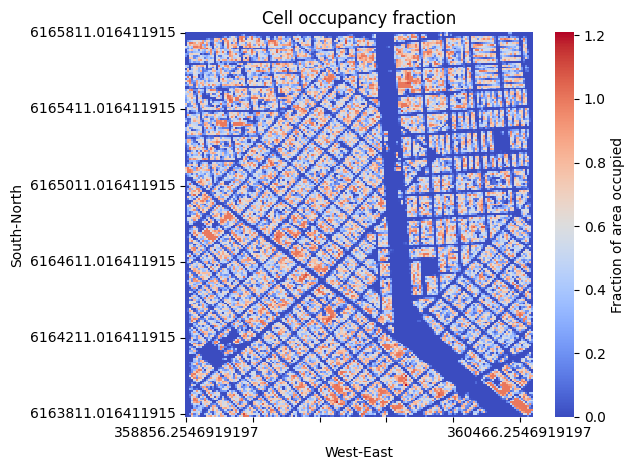

In [38]:
tools.plot_occupied_area_heatmap(intersections, area_center_x=area_center_x, area_center_y=area_center_y, save_as="test.png")

In [39]:
cell_composition = tools.build_cell_composition(intersections)
cell_composition

cell_composition
x_cell y_cell                                                   
-80     1      [{'polygon_tag': '48Q39F26+G2VP', 'fraction_of...
        2      [{'polygon_tag': '48Q39F26+G2VP', 'fraction_of...
        13     [{'polygon_tag': '48Q39F26+X24J', 'fraction_of...
        16     [{'polygon_tag': '48Q39F36+327V', 'fraction_of...
        21     [{'polygon_tag': '48Q39F36+62WR', 'fraction_of...
...                                                          ...
 87    -31     [{'polygon_tag': '48Q38FXH+75G8', 'fraction_of...
       -30     [{'polygon_tag': '48Q38FXH+855P', 'fraction_of...
       -18     [{'polygon_tag': '48Q38FXH+P6JJ', 'fraction_of...
       -17     [{'polygon_tag': '48Q38FXH+Q59X', 'fraction_of...
       -5      [{'polygon_tag': '48Q39F2H+655V', 'fraction_of...

[27562 rows x 1 columns]

In [40]:
cell_composition.iloc[20].values 

array([list([{'polygon_tag': '48Q39F46+92VV', 'fraction_of_buildings_in_cell': 1.0, 'fraction_of_the_building': 0.07611631622919149, 'area': 5.294642175266848}])],
      dtype=object)

In [41]:
cell_composition = tools.add_orientation_to_cells(cell_composition, subset)
cell_composition

  0%|          | 0/27562 [00:00<?, ?it/s]

100%|██████████| 27562/27562 [01:37<00:00, 283.30it/s]


cell_composition  \
x_cell y_cell                                                      
-80     1      [{'polygon_tag': '48Q39F26+G2VP', 'fraction_of...   
        2      [{'polygon_tag': '48Q39F26+G2VP', 'fraction_of...   
        13     [{'polygon_tag': '48Q39F26+X24J', 'fraction_of...   
        16     [{'polygon_tag': '48Q39F36+327V', 'fraction_of...   
        21     [{'polygon_tag': '48Q39F36+62WR', 'fraction_of...   
...                                                          ...   
 87    -31     [{'polygon_tag': '48Q38FXH+75G8', 'fraction_of...   
       -30     [{'polygon_tag': '48Q38FXH+855P', 'fraction_of...   
       -18     [{'polygon_tag': '48Q38FXH+P6JJ', 'fraction_of...   
       -17     [{'polygon_tag': '48Q38FXH+Q59X', 'fraction_of...   
       -5      [{'polygon_tag': '48Q39F2H+655V', 'fraction_of...   

               orientation_angle  eccentricity  
x_cell y_cell                                   
-80     1              41.849618      0.839803  
        2              41.849618      0.839803  
        13             42.594317      0.396035  
        16            125.522465      0.812055  
        21            132.219389      0.627917  
...                          ...           ...  
 87    -31            138.097334      0.808436  
       -30             48.094420      0.827165  
       -18             48.891636      0.855520  
       -17             48.903887      0.634935  
       -5              48.013682      0.819878  

[27562 rows x 3 columns]

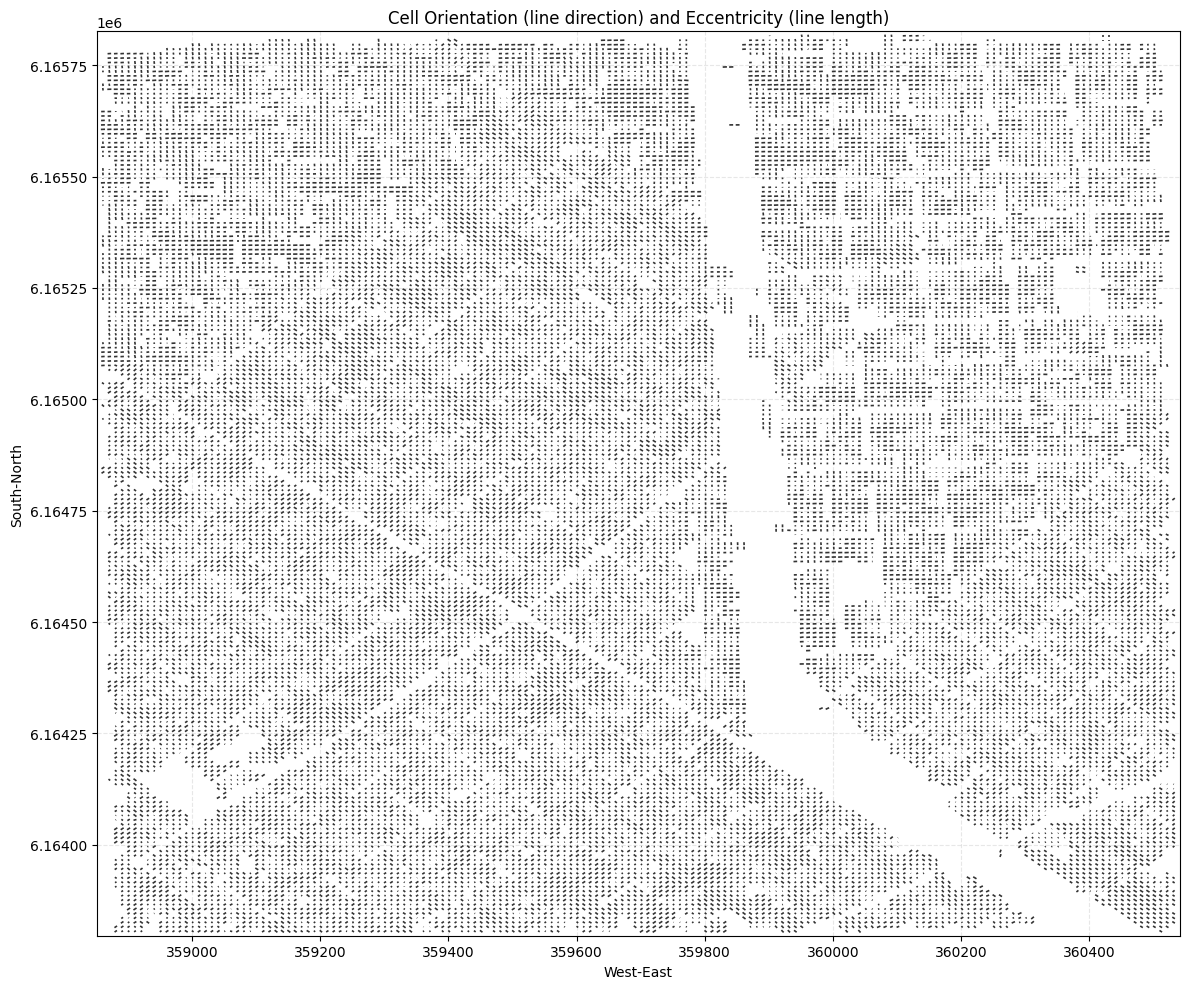

In [42]:
tools.plot_orientation_lines(cell_composition, area_center_x=area_center_x, area_center_y=area_center_y, save_as="test_orientation.png")

density                                           geometry  \
0      9.920112e-03  POLYGON ((-58.54013 -34.64874, -58.54002 -34.6...   
1      4.728028e-03  POLYGON ((-58.54013 -34.64865, -58.54002 -34.6...   
2      3.812915e-05  POLYGON ((-58.54011 -34.64765, -58.54 -34.6476...   
3      9.473658e-03  POLYGON ((-58.54011 -34.64738, -58.54 -34.6473...   
4      4.121727e-04  POLYGON ((-58.5401 -34.64693, -58.53999 -34.64...   
...             ...                                                ...   
27557  1.591938e-02  POLYGON ((-58.52197 -34.65185, -58.52186 -34.6...   
27558  1.807419e-03  POLYGON ((-58.52197 -34.65176, -58.52186 -34.6...   
27559  1.436094e-03  POLYGON ((-58.52195 -34.65068, -58.52184 -34.6...   
27560  2.108443e-02  POLYGON ((-58.52195 -34.65059, -58.52184 -34.6...   
27561  1.402212e-07  POLYGON ((-58.52193 -34.64951, -58.52182 -34.6...   

       center_lon  center_lat  
0      -58.540078  -34.648691  
1      -58.540077  -34.648601  
2      -58.540058  -34.647609  
3      -58.540053  -34.647339  
4      -58.540045  -34.646888  
...           ...         ...  
27557  -58.521914  -34.651805  
27558  -58.521912  -34.651715  
27559  -58.521893  -34.650633  
27560  -58.521891  -34.650543  
27561  -58.521871  -34.649461  

[27562 rows x 4 columns]

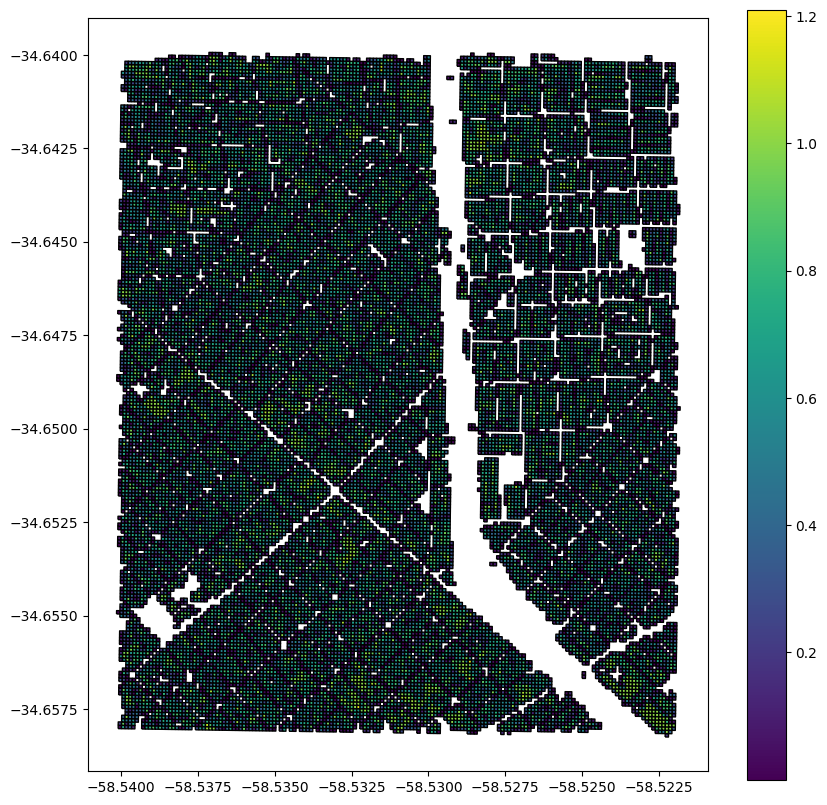

In [53]:
# Now we will save all outputs into geojson files
geo_density = tools.build_cell_density_geodataframe(cell_composition, area_center_x=area_center_x, area_center_y=area_center_y, reproject_to_latlon=True, utm_crs=subset.crs)
geo_density.plot(column="density", cmap="viridis", legend=True, figsize=(10, 10), edgecolor="black")
geo_density.to_file("density.geojson", driver="GeoJSON")
geo_density

geometry full_plus_code  \
0      POLYGON ((-58.5387 -34.64793, -58.53878 -34.64...  48Q39F26+RFQM   
1      POLYGON ((-58.52998 -34.6464, -58.53004 -34.64...  48Q39F39+CXPX   
2      POLYGON ((-58.52815 -34.64327, -58.52816 -34.6...  48Q39F4C+PP4F   
3      POLYGON ((-58.53989 -34.64556, -58.5399 -34.64...  48Q39F36+Q2GQ   
4      POLYGON ((-58.52303 -34.65036, -58.5231 -34.65...  48Q38FXG+RQRX   
...                                                  ...            ...   
18972  POLYGON ((-58.53335 -34.6508, -58.5334 -34.650...  48Q38FX8+MJHJ   
18973  POLYGON ((-58.52664 -34.64224, -58.52665 -34.6...  48Q39F5F+487P   
18974  POLYGON ((-58.53775 -34.64211, -58.53776 -34.6...  48Q39F56+5V9R   
18975  POLYGON ((-58.52252 -34.65499, -58.52254 -34.6...  48Q38FWG+2X3X   
18976  POLYGON ((-58.52349 -34.65462, -58.52352 -34.6...  48Q38FWG+4JJQ   

       orientation_angle  eccentricity  longitude   latitude  
0             132.554009      0.814894 -58.538768 -34.647908  
1             138.285582      0.329301 -58.530037 -34.646404  
2              93.707791      0.914511 -58.528175 -34.643235  
3              18.382848      0.438149 -58.539914 -34.645557  
4              55.551140      0.567702 -58.523097 -34.650375  
...                  ...           ...        ...        ...  
18972          50.611812      0.634655 -58.533399 -34.650807  
18973           3.529163      0.516111 -58.526698 -34.642205  
18974          94.432907      0.707196 -58.537778 -34.642080  
18975          37.978154      0.455345 -58.522570 -34.654978  
18976         138.176515      0.913813 -58.523471 -34.654656  

[18977 rows x 6 columns]

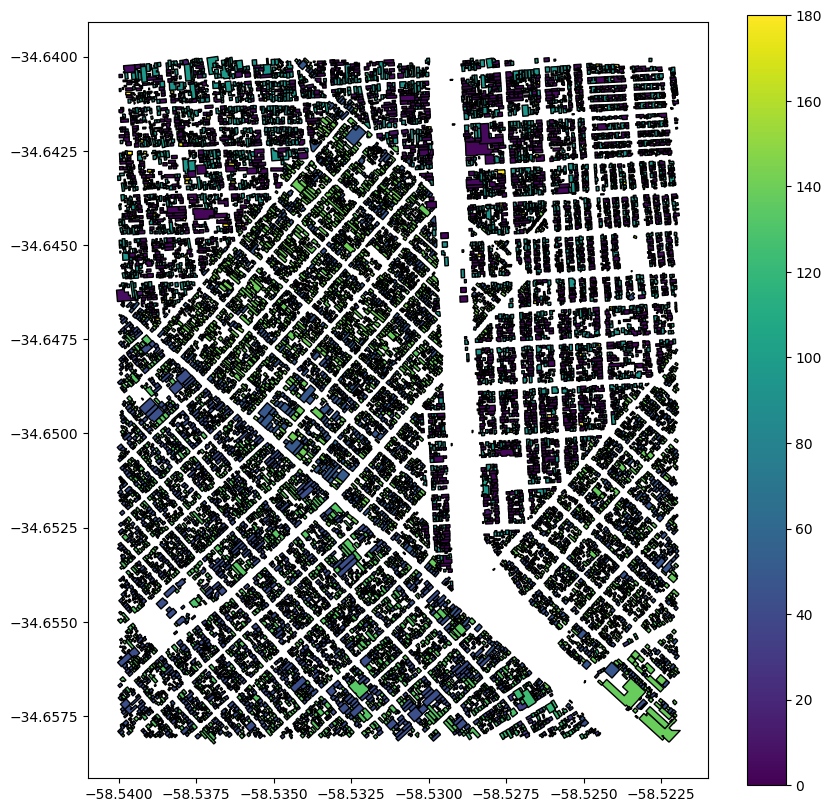

In [56]:
# Now we export the buildings orientation
geo_orientation = tools.build_building_orientation_geodataframe(subset, reproject_to_latlon=True, utm_crs=subset.crs)
geo_orientation.plot(column="orientation_angle", cmap="viridis", legend=True, figsize=(10, 10), edgecolor="black")
geo_orientation.to_file("orientation.geojson", driver="GeoJSON")
geo_orientation

orientation_angle  eccentricity  longitude   latitude  \
0              41.849618      0.839803 -58.540078 -34.648691   
1              41.849618      0.839803 -58.540077 -34.648601   
2              42.594317      0.396035 -58.540058 -34.647609   
3             125.522465      0.812055 -58.540053 -34.647339   
4             132.219389      0.627917 -58.540045 -34.646888   
...                  ...           ...        ...        ...   
27557         138.097334      0.808436 -58.521914 -34.651805   
27558          48.094420      0.827165 -58.521912 -34.651715   
27559          48.891636      0.855520 -58.521893 -34.650633   
27560          48.903887      0.634935 -58.521891 -34.650543   
27561          48.013682      0.819878 -58.521871 -34.649461   

                                                geometry  
0      POLYGON ((-58.54013 -34.64874, -58.54002 -34.6...  
1      POLYGON ((-58.54013 -34.64865, -58.54002 -34.6...  
2      POLYGON ((-58.54011 -34.64765, -58.54 -34.6476...  
3      POLYGON ((-58.54011 -34.64738, -58.54 -34.6473...  
4      POLYGON ((-58.5401 -34.64693, -58.53999 -34.64...  
...                                                  ...  
27557  POLYGON ((-58.52197 -34.65185, -58.52186 -34.6...  
27558  POLYGON ((-58.52197 -34.65176, -58.52186 -34.6...  
27559  POLYGON ((-58.52195 -34.65068, -58.52184 -34.6...  
27560  POLYGON ((-58.52195 -34.65059, -58.52184 -34.6...  
27561  POLYGON ((-58.52193 -34.64951, -58.52182 -34.6...  

[27562 rows x 5 columns]

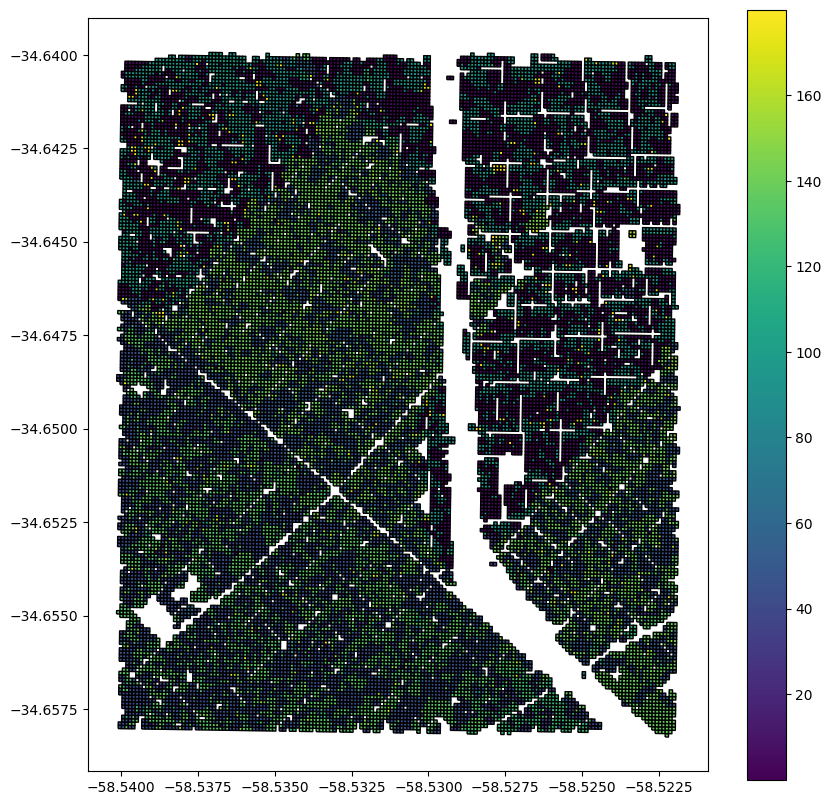

In [57]:
# And we export the cells orientation
geo_cells_orientation = tools.build_cell_orientation_geodataframe(cell_composition, area_center_x=area_center_x, area_center_y=area_center_y, reproject_to_latlon=True, utm_crs=subset.crs)
geo_cells_orientation.plot(column="orientation_angle", cmap="viridis", legend=True, figsize=(10, 10), edgecolor="black")
geo_cells_orientation.to_file("cells_orientation.geojson", driver="GeoJSON")
geo_cells_orientation